In [14]:
import yfinance as yf
tesla = yf.download("TSLA", end='2023-05-02')
price = tesla["Adj Close"]
print (price)
R = price.pct_change().dropna()
print (R)

[*********************100%***********************]  1 of 1 completed
Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2023-04-25    160.669998
2023-04-26    153.750000
2023-04-27    160.190002
2023-04-28    164.309998
2023-05-01    161.830002
Name: Adj Close, Length: 3232, dtype: float64
Date
2010-06-30   -0.002511
2010-07-01   -0.078473
2010-07-02   -0.125683
2010-07-06   -0.160937
2010-07-07   -0.019243
                ...   
2023-04-25   -0.011566
2023-04-26   -0.043070
2023-04-27    0.041886
2023-04-28    0.025719
2023-05-01   -0.015093
Name: Adj Close, Length: 3231, dtype: float64


In [15]:
R2 = R*100
R2

Date
2010-06-30    -0.251148
2010-07-01    -7.847274
2010-07-02   -12.568307
2010-07-06   -16.093748
2010-07-07    -1.924298
                ...    
2023-04-25    -1.156570
2023-04-26    -4.306963
2023-04-27     4.188619
2023-04-28     2.571943
2023-05-01    -1.509340
Name: Adj Close, Length: 3231, dtype: float64

(2592, 8, 1)
(623, 8, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 64)             192       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 32)             4128      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             

<function matplotlib.pyplot.show(close=None, block=None)>

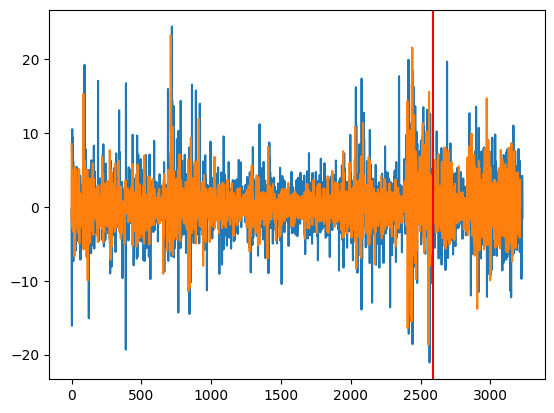

In [16]:
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D
import keras.optimizers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import openpyxl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.optimizers import Adam


def split_sequence(data, step):
    X , Y = [], []
    for i in range (len(data)-step):
        d= i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

step=8
features=1
# define univariate time series 
series = R2
#print (series)
#series.shape
series2 = np.array(series) 
train, test =  series2[0:2600], series2[2600:]
# transform to a supervised learning problem 
trainX, trainY = split_sequence(train, step) 
testX, testY = split_sequence(test, step) 
trainX = np.reshape(trainX , (trainX.shape[0], trainX.shape[1], 1))
testX  = np.reshape(testX , (testX.shape[0], testX.shape[1], 1))

print(trainX.shape)
print(testX.shape)

model = Sequential() 
model.add(Conv1D(filters=64, kernel_size=2, activation='relu' , input_shape=(step,features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=2))
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten()) 
model.add(Dense(50, activation='relu' )) 
model.add(Dense(1)) 
model.compile(optimizer='adam' , loss='mse' )

history_model=model.fit(trainX, trainY, epochs=200, verbose=0)
model.summary() 

print(history_model.history['loss'])


testscore = model.evaluate(testX, testY, verbose=0)
print("testscore is: ****  ", testscore)


trainpredict = model.predict(trainX)
testpredict = model.predict(testX)
totalpredict = np.concatenate((trainpredict, testpredict), axis=0)



plt.plot (series2)
plt.plot (totalpredict) 
plt.axvline (len(trainX), c="r")
plt.show

In [17]:
# Define the number of days to predict
num_pred_days = 10

# Initialize the input sequence with the last 8 days from the test data
last_days = testX[-1]

# Reshape the input sequence to match the model's input shape
last_days = last_days.reshape((1, step, features))

# Make predictions for the next 10 days
predictions = []
for i in range(num_pred_days):
    pred = model.predict(last_days)
    predictions.append(pred[0][0])
    
    # Append the predicted value to the input sequence
    last_days = np.append(last_days[:, 1:, :], np.expand_dims(pred, axis=1), axis=1)
    last_days = last_days.reshape((1, step, features))  # add this line

# Print the predicted values for the next 10 days
for pred in predictions:
    print(pred)


1/1 [==============================] - 0s 20ms/step
-0.101850614
5.6725426
1.7601376
-2.8027477
3.3677
-1.7262969
2.687658
-1.1407396
-0.20317398
-2.6340876


In [19]:
testX[-1]


array([[-2.01833936],
       [-9.74582823],
       [ 1.28228497],
       [-1.5325895 ],
       [-1.15657019],
       [-4.3069635 ],
       [ 4.18861947],
       [ 2.57194273]])